In [5]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

ERROR: voila 0.2.3 has requirement nbconvert<7,>=6.0.0, but you'll have nbconvert 5.6.1 which is incompatible.


In [6]:
#hide
from fastbook import *
from fastai.vision.widgets import *
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

In [7]:
key = os.environ.get('AZURE_SEARCH_KEY', 'cf5d6cc5b1be495cb6af4df26c48061d')

In [ ]:
types = 'Car','Ship', 'Bicycle', 'Plane'
path = Path('types')

if not path.exists():
    path.mkdir()
    for o in types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} type')
        download_images(dest, urls=results.attrgot('content_url'))

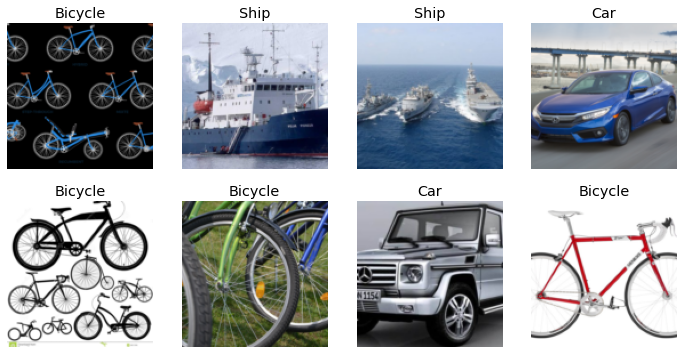

In [23]:
verify_images(get_image_files(path)).map(Path.unlink)

vehicles = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

dls = vehicles.dataloaders(path)

dls.valid.show_batch(max_n=8, nrows=2)

In [26]:
vehicles = vehicles.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

dls = vehicles.dataloaders(path)

learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.537500,0.397377,0.150442,00:20


epoch,train_loss,valid_loss,error_rate,time
0,0.516245,0.284704,0.097345,00:21
1,0.432817,0.173009,0.044248,00:20
2,0.322264,0.248558,0.088496,00:21
3,0.275016,0.257231,0.088496,00:21


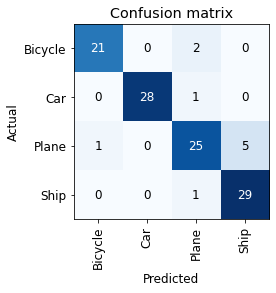

In [27]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [29]:
learn.export()